In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 10 

In today's lecture, we will:
1. review functions and applying functions to tables by building a simple but sophisticated prediction function. 
2. we will introduce the group operation.


<br><br><br><br>

---

## Prediction

Can we predict how tall a child will grow based on the height of their parents?

To do this we will use the famous [Galton's height dataset](https://galton.org/essays/1880-1889/galton-1886-jaigi-regression-stature.pdf) that was collected to demonstrate the connection between parent's heights and the height of their children. 

In [2]:
families = Table.read_table('family_heights.csv')
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


<br><br><br>
**Discussion:** This data was collected for Europeans living in the late 1800s.  What are some of the potential issues with this data?

<br><br>

<br><br><br><br>


### Exploring the Data

**Exercise:** Add a column `"parent average"` containing the average height of both parents.

In [3]:
families = families.with_column(
    "parent average", (families.column('father') + families.column('mother'))/2.0
)
families

family,father,mother,child,children,order,sex,parent average
1,78.5,67,73.2,4,1,male,72.75
1,78.5,67,69.2,4,2,female,72.75
1,78.5,67,69,4,3,female,72.75
1,78.5,67,69,4,4,female,72.75
2,75.5,66.5,73.5,4,1,male,71
2,75.5,66.5,72.5,4,2,male,71
2,75.5,66.5,65.5,4,3,female,71
2,75.5,66.5,65.5,4,4,female,71
3,75,64,71,2,1,male,69.5
3,75,64,68,2,2,female,69.5


<br><details> <summary>Click for Solution</summary><br><br>

```python
families = families.with_column(
    "parent average", (families.column('father') + families.column('mother'))/2.0
)
families
```

<br><br></details>

<br><br><br><br><br><br>

What is the relationship between a child's height and the average parent's height? 

**Exercise:** Make a scatter plot showing the relationship between the `"parent average"` and the `"child"` height.

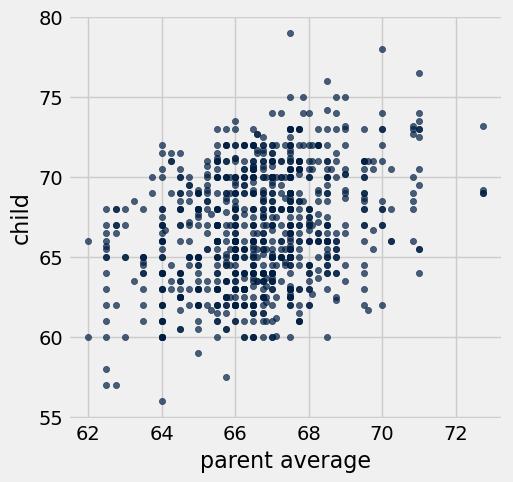

In [4]:
families.scatter("parent average", "child")

<details> <summary>Click for Solution</summary> <br><br>
    
```python

families.scatter("parent average", "child")

```
    
<br><br></details>

**Questions:**
1. Do we observe a relationship between child and parent height?
2. Would a line plot help reveal that relationship? 

<br><br><br><br><br><br>

---

### Making a Prediction

If we wanted to predict the height of a child given the height of the parents, we could look at the heigh of children with parents who have a similar average height. 

In [5]:
my_height = 5*12 + 11 # 5 ft 11 inches
spouse_height = 5*12 + 7 # 5 ft 7 inches

In [6]:
our_average = (my_height + spouse_height) / 2.0
our_average

69.0

Let's look at parents that are within 1 inch of our height.

In [7]:
window = 1 
lower_bound = our_average - window
upper_bound = our_average + window

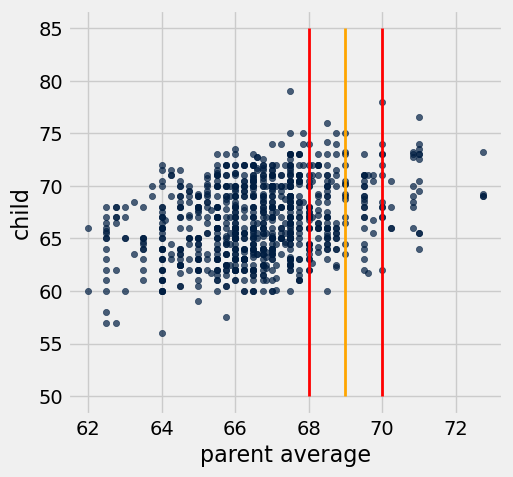

In [8]:
families.scatter('parent average', 'child')
# You don't need to know the details of this plotting code yet.
plots.plot([lower_bound, lower_bound], [50, 85], color='red', lw=2)
plots.plot([our_average, our_average], [50, 85], color='orange', lw=2);
plots.plot([upper_bound, upper_bound], [50, 85], color='red', lw=2);

<br><br><br><br>

**Exercise:** Create a function that takes an average of the parents heights and returns *an __array__ of all the children's heights* that are within the window of the parent's average height.

In [9]:
def similar_child_heights(parent_average):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return (
        families
            .where("parent average", are.between(lower_bound, upper_bound))
            .column("child")
    )

<details> <summary>Click for Solution</summary> <br><br>   

```python
def similar_child_heights(parent_average):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return (
        families
            .where("parent average", are.between(lower_bound, upper_bound))
            .column("child")
    )
```

<br><br></details>

Testing the function:

In [10]:
# window = 1.0
similar_child_heights(our_average)

array([ 71. ,  68. ,  70.5,  68.5,  67. ,  64.5,  63. ,  65.5,  74. ,
        70. ,  68. ,  67. ,  67. ,  66. ,  63.5,  63. ,  71. ,  70.5,
        66.7,  72. ,  70.5,  70.2,  70.2,  69.2,  68.7,  66.5,  64.5,
        63.5,  74. ,  73. ,  71.5,  62.5,  66.5,  62.3,  66. ,  64.5,
        64. ,  62.7,  73. ,  71. ,  67. ,  74.2,  70.5,  69.5,  66. ,
        65.5,  65. ,  65. ,  65.5,  66. ,  63. ,  67.5,  67.2,  66.7,
        73.2,  73. ,  69. ,  67. ,  70. ,  67. ,  67. ,  66.5,  70. ,
        69. ,  68.5,  66. ,  64.5,  63. ,  71. ,  67. ,  76. ,  72. ,
        71. ,  66. ,  66. ,  70.5,  72. ,  72. ,  71. ,  69. ,  66. ,
        65. ,  73. ,  65.2,  68.5,  67.7,  68. ,  68. ,  62. ,  72. ,
        71. ,  70.5,  67. ,  72. ,  71. ,  70. ,  66. ,  64.5,  64.5,
        62. ,  71. ,  70. ,  69. ,  69. ,  70. ,  68.7,  68. ,  66. ,
        64. ,  62. ,  75. ,  70. ,  69. ,  66. ,  64. ,  60. ,  67.5,
        73. ,  72. ,  72. ,  66.5,  69.2,  67.2,  66.5,  66. ,  66. ,
        64.2,  63.7,

<br><br><br><br>

**Exercise:** Create a function to predict the child's height as the average of the height of children within the window of the average parent height.

In [11]:
def predict_child_height(parent_average):
    return np.average(similar_child_heights(parent_average))

<details> <summary>Click for Solution</summary> <br><br>   

```python
def predict_child_height(parent_average):
    return np.average(similar_child_heights(parent_average))
```

<br><br></details>

In [12]:
predict_child_height(our_average)

67.799310344827589

<br><br><br>

Let's plot the predicted height as well as the distribution of children's heights:

Mean: 67.7993103448


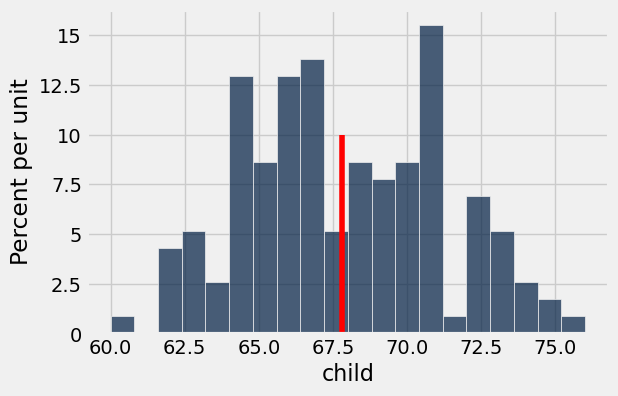

In [13]:
# window = 1.0
similar = similar_child_heights(our_average)
predicted_height = predict_child_height(our_average)

print("Mean:", predicted_height)
Table().with_column("child", similar).hist("child", bins=20)
plots.plot([predicted_height, predicted_height], [0, .1], color="red")

**Discussion:** Is this a good predictor? How would I know?

<br><br><br><br><br><br>

---

### Evaluating the Predictions

To evaluate the predictions, let's see how the predictions compare to the actual heights of all the children in our dataset.  


**Exercise:** Apply the function (using `apply`) to all the parent averages in the table and save the result to the `"predicted"` column.

In [14]:
# window = 0.5
families = families.with_column(
    "predicted", families.apply(predict_child_height, "parent average"))
families

family,father,mother,child,children,order,sex,parent average,predicted
1,78.5,67,73.2,4,1,male,72.75,70.1
1,78.5,67,69.2,4,2,female,72.75,70.1
1,78.5,67,69,4,3,female,72.75,70.1
1,78.5,67,69,4,4,female,72.75,70.1
2,75.5,66.5,73.5,4,1,male,71,69.9971
2,75.5,66.5,72.5,4,2,male,71,69.9971
2,75.5,66.5,65.5,4,3,female,71,69.9971
2,75.5,66.5,65.5,4,4,female,71,69.9971
3,75,64,71,2,1,male,69.5,68.2092
3,75,64,68,2,2,female,69.5,68.2092


<details> <summary>Click for Solution</summary> <br><br>   

```python
# window = 0.5
families = families.with_column(
    "predicted", families.apply(predict_child_height, "parent average"))
families
```

<br><br></details>

<br><br><br><br>
**Exercise:** Construct a scatter plot with the `"parent average"` height on the x-axis and the `"child"` height and the `"predicted"` height on the y-axis. 

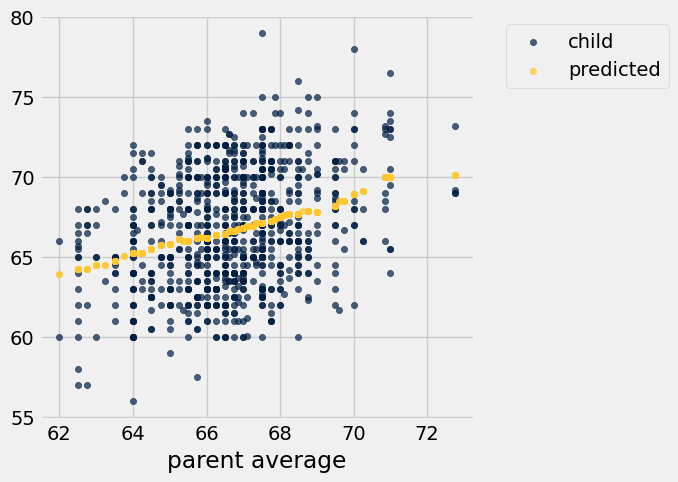

In [15]:
(
    families
    .select('parent average','child', 'predicted')
    .scatter('parent average')
)

<details> <summary>Click for Solution</summary> <br><br>   

```python
(
    families
    .select('parent average','child', 'predicted')
    .scatter('parent average')
)
```

<br><br></details>

**Discussion:** What do we see in this plot?  What trends.

<br><br><br><br>

**Exercise:** Define a function to compute the error (the difference) between the predicted value and the true value and apply that function to the table adding a column containing the `"error"`.  Then construct a histogram of the errors.


In [16]:
def error(predicted, true_value):
    return predicted - true_value

families = families.with_column(
    "error", families.apply(error, "predicted", "child"))
families

family,father,mother,child,children,order,sex,parent average,predicted,error
1,78.5,67,73.2,4,1,male,72.75,70.1,-3.1
1,78.5,67,69.2,4,2,female,72.75,70.1,0.9
1,78.5,67,69,4,3,female,72.75,70.1,1.1
1,78.5,67,69,4,4,female,72.75,70.1,1.1
2,75.5,66.5,73.5,4,1,male,71,69.9971,-3.50286
2,75.5,66.5,72.5,4,2,male,71,69.9971,-2.50286
2,75.5,66.5,65.5,4,3,female,71,69.9971,4.49714
2,75.5,66.5,65.5,4,4,female,71,69.9971,4.49714
3,75,64,71,2,1,male,69.5,68.2092,-2.79083
3,75,64,68,2,2,female,69.5,68.2092,0.209174


<details> <summary>Click for Solution</summary> <br><br>   

```python
def error(predicted, true_value):
    return predicted - true_value

families = families.with_column(
    "error", families.apply(error, "predicted", "child"))
families
```

<br><br></details>

Visualizing the distribution of the errors:

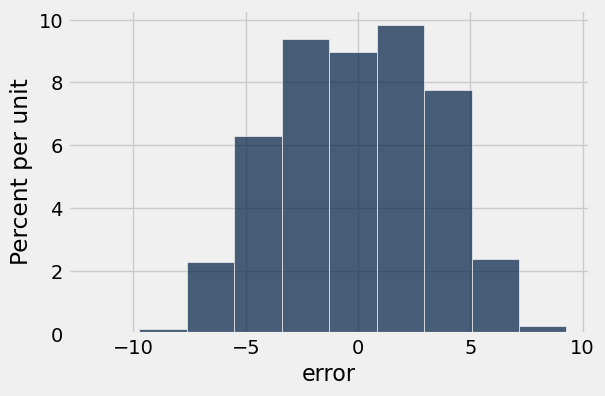

In [17]:
families.hist('error')

**Discussion:** Is this good?
<br><br><br><br><br>

<br><br><br><br><br><br>
**Exercise:** Overlay the histograms of the error for male and female children.

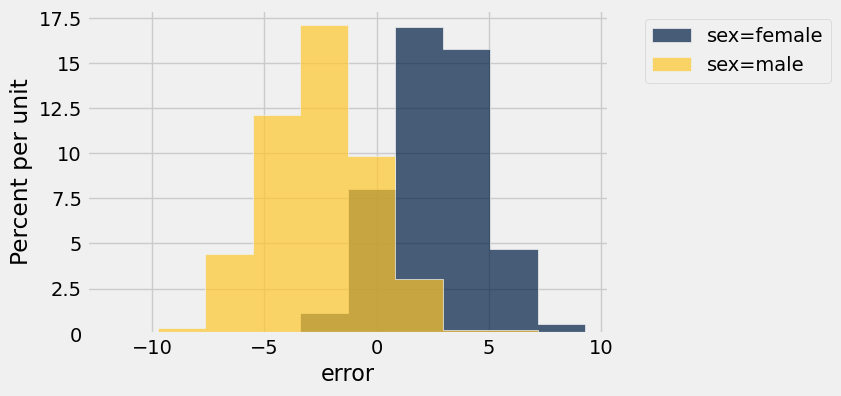

In [18]:
families.hist('error', group='sex')

<details> <summary>Click for Solution</summary> <br><br>   

```python
families.hist('error', group='sex')
```

<br><br></details>

**Discussion:** What do we observe?

<br><br><br><br><br><br>

---

### Building a Better Predictor

Based on what we observed, let's build a better predictor. 

**Exercise:** Implement a new height prediction function that considers averages the  height of children with the same sex and whose parents had a similar height.

*Hint:* Here is the previous function:
```python
def similar_child_heights(parent_average):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return np.average(
        families
            .where("parent average", are.between(lower_bound, upper_bound))
            .column("child")
    )
```

In [19]:
def predict_child_height_with_sex(parent_average, sex):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return np.average(
        families
        .where("sex", sex)
        .where("parent average", are.between(lower_bound, upper_bound))
        .column("child")
    )

<details> <summary>Click for Solution</summary> <br><br>   

```python
def predict_child_height_with_sex(parent_average, sex):
    lower_bound = parent_average - window
    upper_bound = parent_average + window
    return np.average(
        families
        .where("sex", sex)
        .where("parent average", are.between(lower_bound, upper_bound))
        .column("child")
    )
```

<br><br></details>

Let's test it out.

In [20]:
predict_child_height_with_sex(our_average, "male")

70.640298507462674

In [21]:
predict_child_height_with_sex(our_average, "female")

65.358974358974365

<br><br><br><br><br>
**Exercise:** Apply the better predictor to the table and save the predictions in a column called `"predicted with sex"`.

In [22]:
families = families.with_column(
    "predicted with sex", families.apply(predict_child_height_with_sex, "parent average", "sex"))
families

family,father,mother,child,children,order,sex,parent average,predicted,error,predicted with sex
1,78.5,67,73.2,4,1,male,72.75,70.1,-3.1,73.2
1,78.5,67,69.2,4,2,female,72.75,70.1,0.9,69.0667
1,78.5,67,69,4,3,female,72.75,70.1,1.1,69.0667
1,78.5,67,69,4,4,female,72.75,70.1,1.1,69.0667
2,75.5,66.5,73.5,4,1,male,71,69.9971,-3.50286,72.7882
2,75.5,66.5,72.5,4,2,male,71,69.9971,-2.50286,72.7882
2,75.5,66.5,65.5,4,3,female,71,69.9971,4.49714,67.3611
2,75.5,66.5,65.5,4,4,female,71,69.9971,4.49714,67.3611
3,75,64,71,2,1,male,69.5,68.2092,-2.79083,70.9566
3,75,64,68,2,2,female,69.5,68.2092,0.209174,65.6089


<details> <summary>Click for Solution</summary> <br><br>   

```python
families = families.with_column(
    "predicted with sex", families.apply(predict_child_height_with_sex, "parent average", "sex"))
families
```

<br><br></details>

<br><br><br><br>
**Exercise:** Construct a histogram of the new errors broken down by the sex of the child.

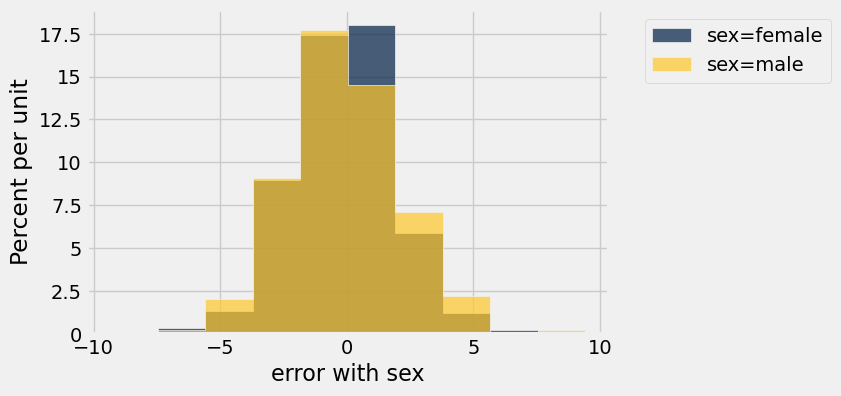

In [23]:
families = families.with_column("error with sex", 
                                families.apply(error, "predicted with sex", "child"))

families.hist("error with sex", group="sex")

As a point of comparison

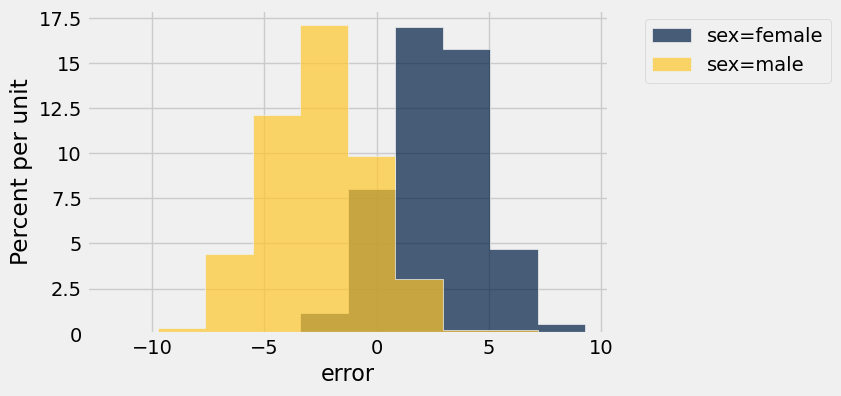

In [24]:
families.hist("error", group="sex")

<br><br><br><br><br>

---

<br>
<center> Return to slides <center>
<br>

---

## Grouping

For this part of the notebook we will use the following toy data:

In [25]:
cones = Table.read_table('cones.csv')
cones

Flavor,Color,Price,Rating
strawberry,pink,3.55,1
chocolate,light brown,4.75,4
chocolate,dark brown,5.25,3
strawberry,pink,5.25,2
chocolate,dark brown,5.25,5
bubblegum,pink,4.75,1


<br><br><br><br>

**Exercise:** Use the `group` function to determine the number of cones with each flavor.

In [26]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


<details> <summary>Click for Solution</summary> <br><br>   

```python
cones.group('Flavor')
```

<br><br></details>

<br><br><br><br>

**Exercise:** Use the `group` function to compute the average price of cones for each flavor.

In [27]:
cones.group('Flavor', np.average)

Flavor,Color average,Price average,Rating average
bubblegum,,4.75,1
chocolate,,5.08333,4
strawberry,,4.4,1.5


<details> <summary>Click for Solution</summary> <br><br>   

```python
cones.group('Flavor', np.average)
 ```

<br><br></details>

<br><br><br><br>

**Exercise:** Use the `group` function to compute min price of cones for each flavor.

In [28]:
cones.group('Flavor', np.min)

Flavor,Color amin,Price amin,Rating amin
bubblegum,,4.75,1
chocolate,,4.75,3
strawberry,,3.55,1


<details> <summary>Click for Solution</summary> <br><br>   

```python
cones.group('Flavor', np.min)
```

<br><br></details>

What is really going on:

In [29]:
cones

Flavor,Color,Price,Rating
strawberry,pink,3.55,1
chocolate,light brown,4.75,4
chocolate,dark brown,5.25,3
strawberry,pink,5.25,2
chocolate,dark brown,5.25,5
bubblegum,pink,4.75,1


In [30]:
def my_grp(grp):
    print(grp)
    return grp

cones.group("Flavor", my_grp)

['pink']
['light brown' 'dark brown' 'dark brown']
['pink' 'pink']
[ 4.75]
[ 4.75  5.25  5.25]
[ 3.55  5.25]
[1]
[4 3 5]
[1 2]


Flavor,Color my_grp,Price my_grp,Rating my_grp
bubblegum,['pink'],[ 4.75],[1]
chocolate,['light brown' 'dark brown' 'dark brown'],[ 4.75 5.25 5.25],[4 3 5]
strawberry,['pink' 'pink'],[ 3.55 5.25],[1 2]


## Grouping the Welcome Survey

Now let's use groups to do something a little more interesting:

In [31]:
survey = Table.read_table('welcome_survey_sp23.csv')
survey.show(3)

Year,Extraversion,Number of textees,Hours of sleep,Handedness,Pant leg,Sleep position,Pets,Piercings
Second Year,2,5,9,Right-handed,Right leg in first,On your right side,"Cat, Dog, Fish, Snake, Lizard",-3
First Year,2,3,8,Right-handed,I don't know,On your back,None,-1
First Year,5,5,8,Right-handed,Right leg in first,On your left side,Bearded dragon,0


### Understanding Extraversion

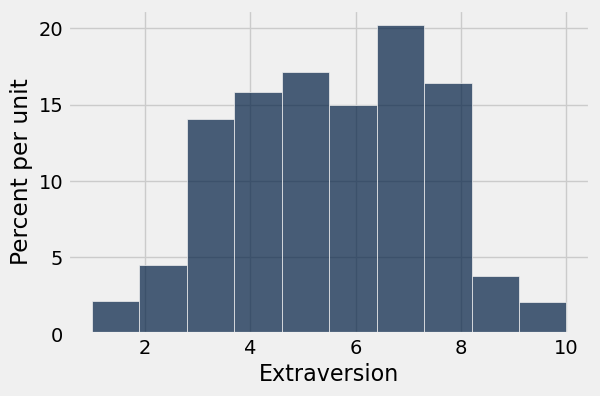

In [32]:
survey.hist('Extraversion')

In [33]:
by_extra = (
    survey
    .where("Piercings", are.below(1000)) # because somebody has too many piercings ...
    .group('Extraversion', np.mean)
)
by_extra

Extraversion,Year mean,Number of textees mean,Hours of sleep mean,Handedness mean,Pant leg mean,Sleep position mean,Pets mean,Piercings mean
1,,3.44828,6.60345,,,,,1.72414
2,,4.08197,6.98361,,,,,1.13115
3,,4.75263,7.23158,,,,,1.41053
4,,5.14953,7.11449,,,,,1.49533
5,,6.14286,7.07576,,,,,1.64502
6,,6.74257,6.98267,,,,,1.87129
7,,11.0221,7.09191,,,,,2.90809
8,,9.7027,7.22297,,,,,2.14414
9,,11.9608,7.29412,,,,,2.41176
10,,9.25,6.78571,,,,,1.89286


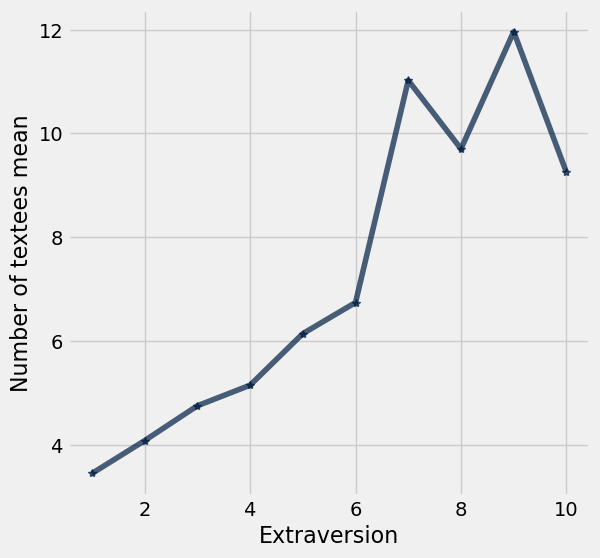

In [34]:
by_extra.plot('Extraversion', 'Number of textees mean', marker="*")

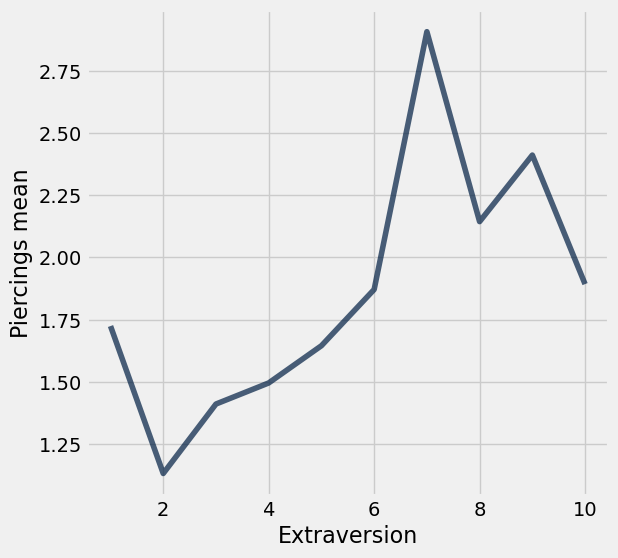

In [35]:
by_extra.plot("Extraversion", "Piercings mean")

### Understanding Sleep

(6.0, 7.5)

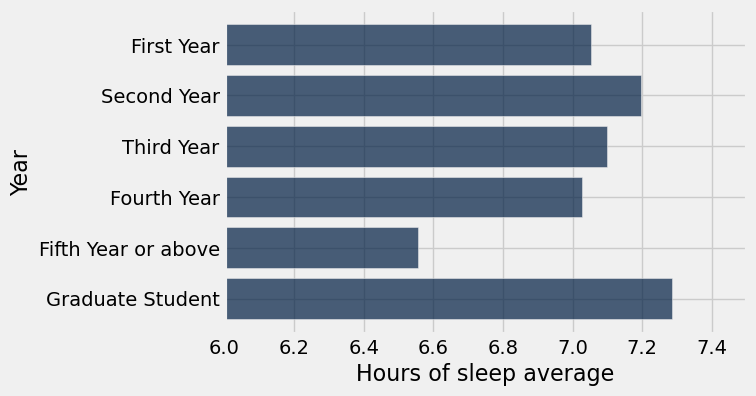

In [36]:
(
    survey
    .select("Year", "Hours of sleep")
    .group("Year", np.average)
    .take(make_array(1,4,5,2,0,3))
    .barh("Year")
)
plots.xlim([6,7.5])

## Grouping by Two Columns ##

![Do right-handed people tend to sleep on their left side and left-handed people sleep on their right?](handed.png)

In [37]:
(
    survey
    .where("Handedness", are.not_containing("Ambidextrous"))
    .group(make_array('Handedness', 'Sleep position'))    
)

Handedness,Sleep position,count
Left-handed,On your back,27
Left-handed,On your left side,40
Left-handed,On your right side,46
Left-handed,On your stomach,9
Right-handed,On your back,334
Right-handed,On your left side,395
Right-handed,On your right side,475
Right-handed,On your stomach,163


On Friday we will learn to pivot:

In [38]:
(
    survey
    .pivot("Sleep position", "Handedness")
#    .barh("Handedness")
)

Handedness,On your back,On your left side,On your right side,On your stomach
Ambidextrous,2,4,3,3
Left-handed,27,40,46,9
Right-handed,334,395,475,163


---
<br><br><br><br>

## Lists

Lists in python are like arrays but they can contain things of different types and you make them by using square brackets:

In [39]:
[1, 5, 'hello', 5.0]

[1, 5, 'hello', 5.0]

In [40]:
another_list = [1, 5, 'hello', 5.0, make_array(1,2,3)]
another_list

[1, 5, 'hello', 5.0, array([1, 2, 3])]

In [41]:
another_list[2]

'hello'

We can use lists instead of array when grouping

In [42]:
survey.group(make_array('Handedness', 'Sleep position'))

Handedness,Sleep position,count
Ambidextrous,On your back,2
Ambidextrous,On your left side,4
Ambidextrous,On your right side,3
Ambidextrous,On your stomach,3
Left-handed,On your back,27
Left-handed,On your left side,40
Left-handed,On your right side,46
Left-handed,On your stomach,9
Right-handed,On your back,334
Right-handed,On your left side,395
